In [1]:
from __future__ import division

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import sys
sys.path.insert(0, '..')

import random
import numpy as np
import pandas as pd
from collections import deque
from scipy.integrate import odeint

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from torch.utils.tensorboard import SummaryWriter

from algs.td3 import Agent_TD3
from algs.ppo import Agent_PPO
from algs.a2c import Agent_A2C
from envs.env import WoundEnv, SimpleEnv, HealNetEnv, healnet, ion_concentration
from cfgs.config import GetParameters

In [2]:
args = GetParameters()
args.alg_rl = 'a2c'
args.model_dir = '../../../../res_wound_rl/res_healnet/models/models_{}/'.format(args.alg_rl)
args.data_dir = '../../../../res_wound_rl/res_healnet/data/data_{}/'.format(args.alg_rl)
args.figs_dir = '../../../../res_wound_rl/res_healnet/figs/figs_{}/'.format(args.alg_rl)

dirs = [args.model_dir, args.data_dir, args.figs_dir]
for dirtmp in dirs:
    if not os.path.exists(dirtmp):
        os.makedirs(dirtmp)

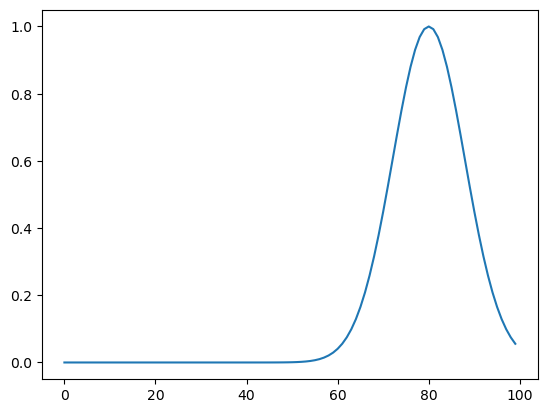

In [3]:
# args.X_pump = 60
# args.n_cells = 100
tetta = np.array([ion_concentration(i - args.X_pump) for i in range(args.n_cells)])
plt.plot(tetta)

In [ ]:
plt.plot(tetta)

In [ ]:
env = WoundEnv(args)
agent = Agent_A2C(env, args)
model_idx = 100
agent.model.load_state_dict(torch.load(args.model_dir + 
                                       'checkpoint_anum_{}_ep_{}.pth'.format(500, model_idx)))

In [ ]:
states_buf = np.empty([0, 5 * env.n_cells])
action_buf = np.empty([0, 2])
state = env.reset()
t = score = 0
while env.cnter <= args.t_nums:
    action = agent.act(state)
    action_buf = np.vstack([action_buf, action])
    next_state, reward, done, info = env.step(action)
    states_buf = np.vstack([states_buf, info])
    if env.cnter > args.t_nums:
        break
    

In [ ]:
states_buf = states_buf.reshape(-1, 5, env.n_cells)

In [ ]:
t_range = np.array(range(len(states_buf)))

fig = plt.figure(figsize=(16, 4), num=1)

ax = fig.add_subplot(111)
ax.plot(t_range, states_buf[:, 0, 0], color='r', linestyle='-', label='Debris')
ax.plot(t_range, states_buf[:, 1, 0], color='g', linestyle='-', label='M1')
ax.plot(t_range, states_buf[:, 2, 0], color='b', linestyle='-', label='M2')
ax.plot(t_range, states_buf[:, 3, 0] / 5, color='m', linestyle='-', label='Temp')
ax.plot(t_range, states_buf[:, 4, 0], color='y', linestyle='-', label='New')
ax.set_xlabel("t, days")
ax.legend()
plt.show()